In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
panel_data = pd.read_csv('sample_stock_valuation_2.csv')
panel_data

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,socialScore,governanceScore,environmentScore,ESG_risk,percentile
0,A,"Agilent Technologies, Inc.",Healthcare,Increase,Above Fair Price,OverValued,Sustainable,132.050003,16.852985,39.663B,...,3.94,0.1231,28.215815,33.515230,53.357284,8.65,6.34,0.34,15.33,10.48
1,AAP,Advance Auto Parts Inc.,Consumer Cyclical,Increase,Above Fair Price,UnderValued,Sustainable,218.800003,10.299689,13.368B,...,9.55,0.1525,14.235524,22.910995,111.559143,9.17,3.70,0.10,12.97,5.74
2,AAPL,Apple Inc.,Technology,Increase,Above Fair Price,OverValued,Sustainable,167.300003,26.658995,2.73T,...,6.01,0.1485,25.503050,27.813800,82.604411,6.86,8.76,0.65,16.27,12.87
3,ABBV,AbbVie Inc.,Healthcare,Increase,Above Fair Price,OverValued,Average,144.029999,19.632876,254.628B,...,6.45,0.0410,11.738386,22.330233,29.389959,16.92,9.98,1.12,28.01,53.78
4,ABC,AmerisourceBergen Corporation,Healthcare,Increase,Above Fair Price,OverValued,Sustainable,141.500000,16.451440,29.593B,...,7.71,0.1034,12.229905,18.348030,48.745000,6.35,5.50,0.84,12.69,5.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,XRAY,DENTSPLY SIRONA Inc.,Healthcare,Increase,Below Fair Price,UnderValued,Not Sustainable,55.090000,4.236675,12.043B,...,1.90,0.2497,17.269592,28.964249,58.151007,10.42,6.55,3.15,20.12,24.40
397,XYL,Xylem Inc.,Industrials,Increase,Above Fair Price,UnderValued,Sustainable,90.660004,14.126965,16.348B,...,2.55,0.1876,30.220001,35.566890,60.576924,7.58,5.08,3.30,15.95,12.05
398,YUM,"Yum! Brands, Inc.",Consumer Cyclical,Decrease,Above Fair Price,UnderValued,Average,125.800003,12.452702,36.876B,...,5.18,0.1521,25.414143,24.295095,63.966029,13.08,4.70,3.90,21.68,29.73
399,ZBH,"Zimmer Biomet Holdings, Inc.",Healthcare,Increase,Above Fair Price,UnderValued,Average,121.019997,7.981383,25.282B,...,3.91,0.0975,15.089774,30.919773,39.695681,13.62,9.93,4.53,28.08,54.02


In [3]:
panel_data.isnull().sum()

ticker                  0
name                    0
sector                  0
Earnings_expectation    0
irv_status              0
capm_status             0
esg_status              0
current_price           0
annu_return_10y         0
market_cap              0
marketcap_cat           0
beta                    3
eps_ttm                 0
growth_estimate_5y      0
pe_forward              0
pe_trailing             0
irv_FairValue           0
socialScore             0
governanceScore         0
environmentScore        0
ESG_risk                0
percentile              0
dtype: int64

In [4]:
panel_data.dropna(inplace=True)
panel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 400
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticker                398 non-null    object 
 1   name                  398 non-null    object 
 2   sector                398 non-null    object 
 3   Earnings_expectation  398 non-null    object 
 4   irv_status            398 non-null    object 
 5   capm_status           398 non-null    object 
 6   esg_status            398 non-null    object 
 7   current_price         398 non-null    float64
 8   annu_return_10y       398 non-null    float64
 9   market_cap            398 non-null    object 
 10  marketcap_cat         398 non-null    object 
 11  beta                  398 non-null    float64
 12  eps_ttm               398 non-null    float64
 13  growth_estimate_5y    398 non-null    float64
 14  pe_forward            398 non-null    float64
 15  pe_trailing           3

In [5]:
panel_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
current_price,398.0,202.318719,378.220174,15.850000,68.394999,121.239998,209.682495,4.996040e+03
annu_return_10y,398.0,15.055756,7.490318,-3.861916,10.312359,14.761092,19.189761,6.196164e+01
beta,398.0,1.056131,0.441078,-0.130000,0.790000,1.050000,1.280000,3.060000e+00
eps_ttm,398.0,150.562186,2820.157211,0.130000,2.922500,5.235000,8.932500,5.626956e+04
growth_estimate_5y,398.0,0.175844,0.344428,-3.830000,0.079000,0.130000,0.193825,2.726500e+00
pe_forward,398.0,28.790405,132.606565,0.622115,13.708060,18.202106,25.463648,2.647000e+03
pe_trailing,398.0,35.385654,66.711856,0.005594,15.915741,24.065173,34.610427,1.074357e+03
irv_FairValue,398.0,37996.826996,538127.629758,-72260.146239,25.488680,57.678670,135.907741,1.024208e+07
socialScore,398.0,9.122839,3.854850,1.270000,6.342500,8.970000,11.892500,2.101000e+01
governanceScore,398.0,6.912261,2.322048,3.200000,5.280000,6.330000,7.975000,1.551000e+01


In [6]:
panel_data.loc[panel_data['irv_FairValue'] == panel_data['irv_FairValue'].max()]

,ticker,name,sector,Earnings_expectation,irv_status,capm_status,esg_status,current_price,annu_return_10y,market_cap,...,eps_ttm,growth_estimate_5y,pe_forward,pe_trailing,irv_FairValue,socialScore,governanceScore,environmentScore,ESG_risk,percentile
55,BKNG,Booking Holdings Inc. Common St,Consumer Cyclical,Increase,Below Fair Price,UnderValued,Average,2616.409912,16.164534,107.429B,...,9.25,2.1141,26.065052,282.85513,1.024208e+07,12.45,7.18,2.02,21.65,29.6


In [7]:
def CAPM_analysis(beta, annual_return, market_return=0.1444214548922984, risk_free_rate = 0.0192):
    try:
        if beta == None or annual_return == None:
            return 'NaN'
        else:
            capm_status = 'TBD'
            
            capm_ER = risk_free_rate + beta * (market_return - risk_free_rate)

            if (annual_return/100) > capm_ER:
                capm_status = 'OverValued'
            else:
                capm_status = 'UnderValued'
        
        return capm_status, capm_ER
    except:
        return 'NaN'

In [8]:
df_capm = pd.DataFrame(columns=['ticker', 'annu_return_10y', 'beta', 'capm_return'])
df_capm['ticker'] = panel_data['ticker']
df_capm['annu_return_10y'] = panel_data['annu_return_10y']
df_capm['beta'] = panel_data['beta']

for row,col in df_capm.iterrows():
    df_capm['capm_return'][row] = CAPM_analysis(df_capm['beta'][row], df_capm['annu_return_10y'][row])[1]

/var/folders/d3/55cvkr5s6jx2frz250bk6pxh0000gn/T/ipykernel_13195/1136055931.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capm['capm_return'][row] = CAPM_analysis(df_capm['beta'][row], df_capm['annu_return_10y'][row])[1]


In [9]:
x = np.linspace(0,50,100)
y = 0.0192 + x * (0.1444214548922984 - 0.0192)

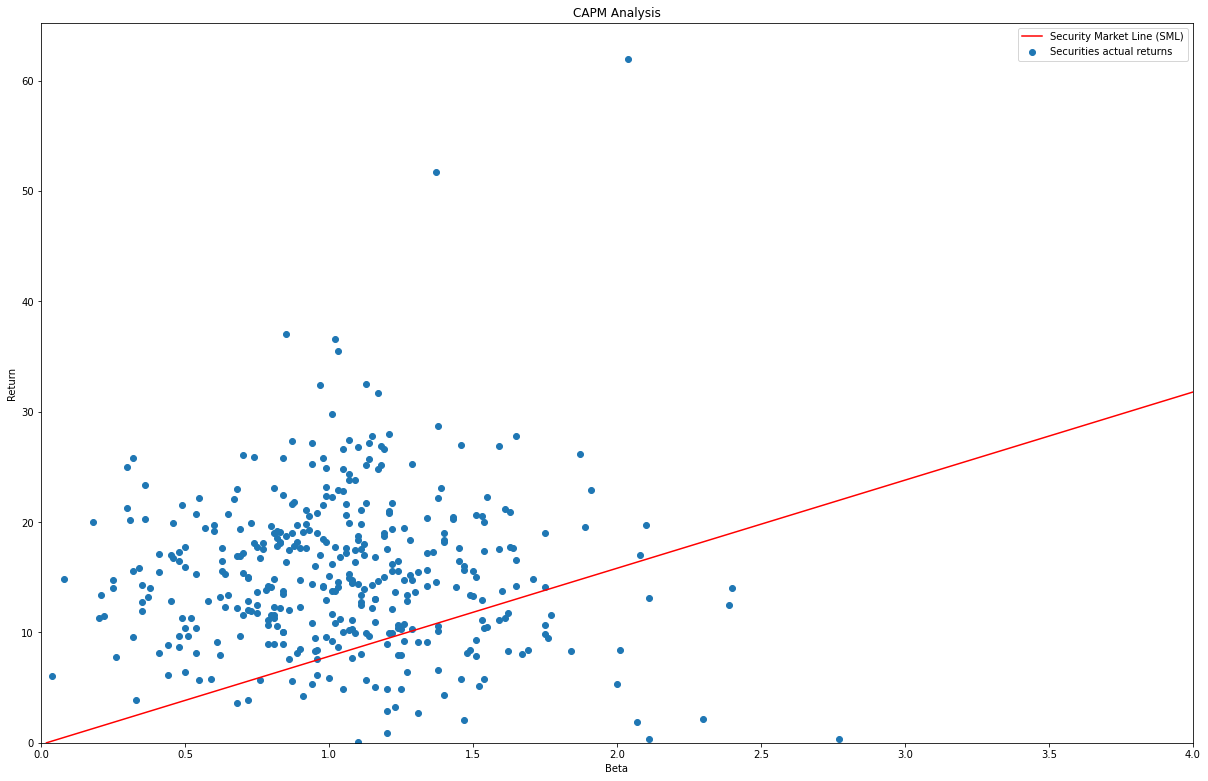

In [10]:
fig = plt.figure(figsize=(16,10))

ax = fig.add_axes([0,0,1,1])
ax.plot(y, x, 'r', label= 'Security Market Line (SML)')
ax.scatter(df_capm['beta'],df_capm['annu_return_10y'], label='Securities actual returns')


ax.set_xlim(0,4)
ax.set_ylim(0)


ax.set_xlabel('Beta')
ax.set_ylabel('Return')
ax.set_title('CAPM Analysis')

ax.legend()
